Liquidation Theory

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [39]:
stock_ticker_to_compare = 'NOW'

In [40]:
df_ww = pd.read_csv('Documents/Whale_wisdom/melvin_capital_management_lp-current-2021-02-13_16_11_41.csv') #make df out of csv
ticker_list = [i for i in df_ww['Symbol']] #list of stocks they own by symbol

df_sh = pd.read_csv('Documents/scrape/Melvin_holdings_historicals.csv')
df_gme = pd.read_csv('Documents/scrape/GME_historicals.csv')
df_2 = df_sh[df_sh['Symbol'].str.match('^'+stock_ticker_to_compare+'$')]

print(ticker_list)
#print(df_sh)

['FISV', 'BABA', 'EXPE', 'BKNG', 'LB', 'NOW', 'FISV', 'BABA', 'AAP', 'AMZN', 'PINS', 'AZO', 'FICO', 'LVS', 'V', 'DOCU', 'ADBE', 'MA', 'GOOGL', 'NKE', 'BKNG', 'JD', 'LH', 'ALGN', 'EXPE', 'MCD', 'DDOG', 'SE', 'NUAN', 'TJX', 'V', 'TXRH', 'LOW', 'MSFT', 'IT', 'IAA', 'H', 'PLAN', 'AEO', 'AMD', 'TPX', 'GSX', 'WYNN', 'PYPL', 'HLT', 'MSCI', 'WDAY', 'DDOG', 'DRI', 'VTRS', 'DECK', 'PINS', 'RACE', 'SBAC', 'LVS', 'LYV', 'DPZ', 'TEAM', 'BURL', 'WYNN', 'EAT', 'MLM', 'AAP', 'LGND', 'GME', 'FIZZ', 'SQ', 'CAR', 'BBBY', 'ELAN', 'KAR', 'TWTR', 'IRBT', 'RHP', 'OLLI', 'IRM', 'TRN', 'ADYYF', 'AEO', 'TUP', 'VIAC', 'HASI', 'LAUR', 'DDS', 'SKT', 'MNKKQ', 'CROX', 'TLRDQ', 'BBY', 'WBA', 'THO', 'YUM', 'KR', 'NFLX', 'RHI', 'VRSN', 'FIS', 'TPX', 'CSGP', 'NWL', 'CMPR', 'EL', 'CHD', 'MHK', 'MED', 'CRM', 'WEN', 'SPWR', 'FICO', 'FLT', 'DNKN', 'FB', 'JD', 'BILL', 'TWLO', 'TRHC', 'CWH', 'CDAY', 'PLAN']


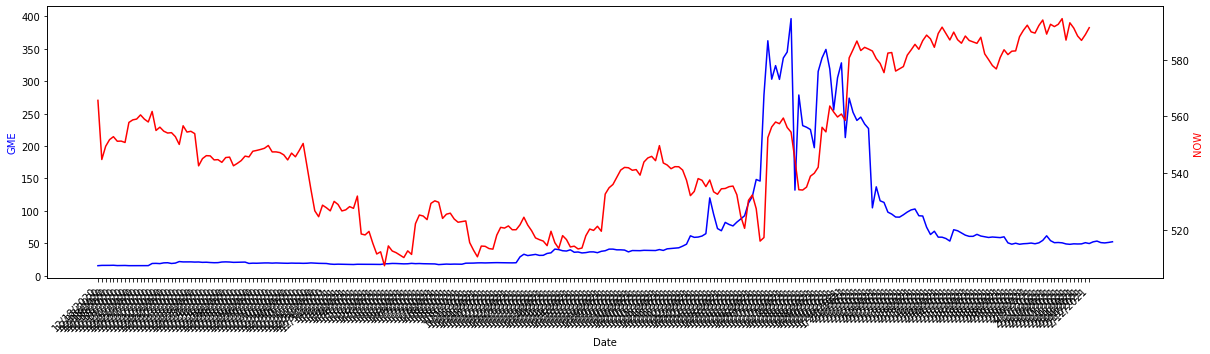

In [26]:

fig, ax1 = plt.subplots(figsize = (20,5))

ax2 = ax1.twinx()
ax1.plot(df_gme['Datetime'], df_gme['Close'], color='blue')
ax2.plot(df_2['Datetime'], df_2['Close'], color='red')

xticklabels = df_sh['Date']
ax1.set_xlabel('Date')
ax1.set_xticklabels(xticklabels, rotation = 45, ha="right")
ax1.set_ylabel('GME', color='blue')
ax2.set_ylabel(stock_ticker_to_compare, color='red')
plt.show()



In [41]:
x = [i for i in df_gme['Close']]
y = [i for i in df_2['Close']]
coeff = np.corrcoef(x,y)

print(coeff)

[[1.         0.07286574]
 [0.07286574 1.        ]]


In [42]:
ticker_coeff_dict = {}
for ticker in ticker_list:
    #print(ticker)
    df_3 = df_sh[df_sh['Symbol'].str.match('^'+ticker+'$')]
    x = [i for i in df_gme['Close']]
    y = [i for i in df_3['Close']]
    try:
        coeff = np.corrcoef(x,y)
        ticker_coeff_dict[ticker] = coeff[1][0]
        #print('-Found-')
    except:
        #print('Ticker not found')
        
    

IndentationError: expected an indented block (<ipython-input-42-e1c99e6d70c2>, line 14)

In [31]:
print(ticker_coeff_dict)

{'FISV': -0.7300101268941351, 'BABA': 0.3950651274655473, 'EXPE': -0.39665213008774197, 'BKNG': -0.743747370994027, 'LB': -0.17479171611620603, 'NOW': 0.07286573844210911}
